## K-Means Clusturing

In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
# we will read the CSV file and look at the first five rows of the data:

data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


we will be taking only two variables from the data – “LoanAmount” and “ApplicantIncome”.

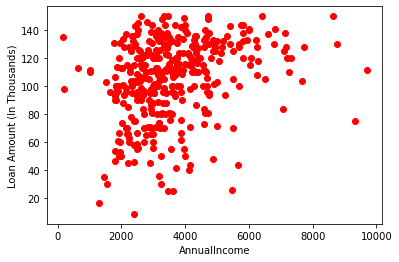

In [4]:
X = data[["LoanAmount", "ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c = 'r')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

We will pick 3 clusters and then select random observations from the data as the centroids:

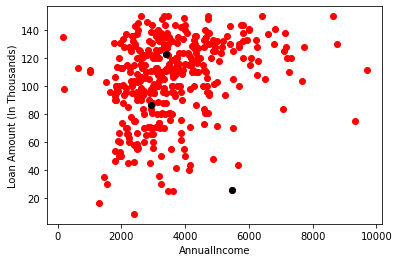

In [15]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

# number of clusters
K = 3

# Select random observation as centroids
Centroids = (X.sample(n = K))
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c ='r')
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c ='k')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

Next, we will define some conditions to implement the K-Means Clustering algorithm. 

In [16]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

<ipython-input-16-912b3f05973f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-16-912b3f05973f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


223.91917454241613
221.2270792519002
229.73252920748018
216.9753660697176
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


These values might vary every time we run this. Here, we are stopping the training when the centroids are not changing after two iterations. We have initially defined the diff as 1 and inside the while loop, we are calculating this diff as the difference between the centroids in the previous iteration and the current iteration.

When this difference is 0, we are stopping the training. Let’s now visualize the clusters we have got:

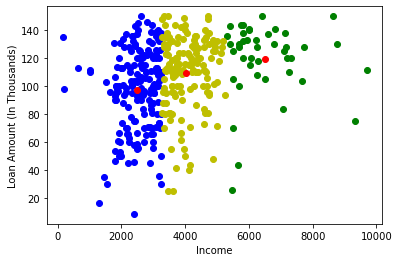

In [19]:
color=['blue','green','y']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c ='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

## Customer Segmentation with K-Means

In [23]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [27]:
# reading the data and looking at the first five rows of the data
wc = pd.read_csv("wholesale_customers.csv")
wc.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [28]:
# statistics of the data
wc.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [29]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wc_scaled = scaler.fit_transform(wc)

# statistics of scaled data
pd.DataFrame(wc_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [30]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(wc_scaled)

KMeans(n_clusters=2)

In [31]:
# inertia on the fitted data
kmeans.inertia_

2599.3855593561393

/Users/ganeshrb/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/ganeshrb/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/ganeshrb/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/ganeshrb/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/ganeshrb/opt/anac

Text(0, 0.5, 'Inertia')

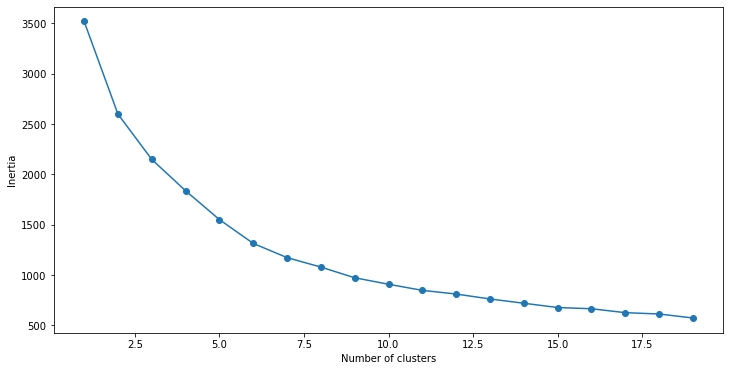

In [33]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(wc_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [43]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(wc_scaled)
pred = kmeans.predict(wc_scaled)

/Users/ganeshrb/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [44]:
# Finally, let’s look at the value count of points in each of the above-formed clusters:

frame = pd.DataFrame(wc_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    203
3    126
0     91
4     10
2     10
Name: cluster, dtype: int64

In [45]:
labels = kmeans.labels_
print(labels)

[3 3 3 1 3 3 3 3 1 3 3 3 3 3 3 1 3 1 3 1 3 1 1 2 3 3 1 1 3 1 1 1 1 1 1 3 1
 3 3 1 1 1 3 3 3 3 3 4 3 3 1 1 3 3 1 1 4 3 1 1 3 4 3 3 1 4 1 3 1 1 1 2 1 3
 3 1 1 3 1 1 1 3 3 1 3 4 4 2 1 1 1 1 4 2 3 1 3 1 1 1 3 3 3 2 1 1 3 3 3 3 1
 3 1 1 1 1 1 1 1 1 1 1 1 3 1 2 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1
 1 1 1 1 1 1 1 3 3 1 3 3 3 1 1 3 3 3 3 1 1 1 3 3 1 3 1 3 1 1 1 1 1 2 1 2 1
 1 1 1 3 3 1 1 1 3 1 1 0 3 0 0 3 3 0 0 0 3 0 0 0 3 0 4 0 0 3 0 3 0 3 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 4 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 3 0 3 0 0 0 0 1 1 1 1 1 1 3 1 3 1 1 2 1 1 1 1 1 1 1 1 3 0 3
 0 3 3 0 3 3 3 3 3 3 3 0 0 3 0 0 3 0 0 3 0 0 0 3 0 0 0 0 0 2 0 0 0 0 0 3 0
 4 0 3 0 0 0 0 3 3 1 3 1 1 3 3 1 3 1 3 1 3 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1
 3 1 1 3 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1
 3 3 1 1 1 1 1 1 3 3 1 3 1 1 3 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1]


In [55]:
# We assign the labels to each row in dataframe.
wc["Clusters_km"] = labels
wc.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters_km
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,3


In [58]:
wc.groupby('Clusters_km').count()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Clusters_km,,,,,,,,
0,91,91,91,91,91,91,91,91
1,203,203,203,203,203,203,203,203
2,10,10,10,10,10,10,10,10
3,126,126,126,126,126,126,126,126
4,10,10,10,10,10,10,10,10


In [59]:
wc.groupby('Clusters_km').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Clusters_km,,,,,,,,
0,1.054945,1.307692,12183.945055,3254.714286,4130.923077,3458.252747,860.263736,1149.934066
1,1.000000,3.000000,12340.546798,3159.640394,3556.379310,3095.443350,748.625616,1115.871921
2,1.100000,2.900000,48222.800000,14755.300000,13380.100000,20925.400000,1962.800000,11596.800000
3,2.000000,2.674603,8130.031746,8874.071429,14139.150794,1339.476190,6104.936508,1542.706349
4,2.000000,2.500000,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000


## Another example: Customer Segmentation with K-Means

In [60]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


As you can see, Address in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.

In [61]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


Now let's normalize the dataset. Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. 

We use StandardScaler() to normalize our dataset.

In [62]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [64]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(Clus_dataSet)

KMeans(n_clusters=2)

/Users/ganeshrb/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/ganeshrb/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/ganeshrb/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/ganeshrb/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/ganeshrb/opt/anac

Text(0, 0.5, 'Inertia')

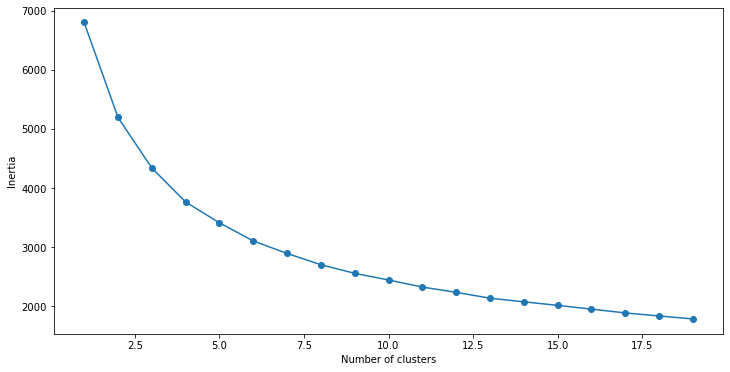

In [65]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(Clus_dataSet)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [76]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(init = "k-means++", n_clusters = 5)
kmeans.fit(Clus_dataSet)
pred = kmeans.predict(Clus_dataSet)
pred

array([1, 3, 2, 1, 0, 3, 1, 4, 1, 3, 2, 1, 1, 3, 2, 1, 1, 4, 3, 3, 1, 4,
       2, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 4, 1, 1, 2, 2, 1, 3, 2, 3, 1, 4,
       1, 3, 1, 1, 1, 1, 3, 3, 2, 3, 2, 2, 2, 4, 3, 3, 3, 3, 3, 3, 1, 1,
       3, 2, 1, 2, 4, 4, 3, 1, 1, 1, 1, 1, 0, 3, 3, 0, 3, 1, 3, 1, 4, 1,
       2, 2, 3, 1, 2, 2, 4, 1, 1, 1, 2, 4, 2, 0, 3, 2, 2, 3, 1, 1, 1, 4,
       3, 4, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 4, 3, 1, 3, 1, 1, 1, 1, 1, 3,
       1, 4, 1, 4, 3, 1, 3, 2, 2, 1, 1, 1, 0, 4, 3, 2, 1, 1, 1, 3, 2, 1,
       1, 3, 3, 3, 2, 2, 1, 4, 3, 1, 1, 4, 4, 1, 1, 4, 3, 1, 4, 2, 1, 2,
       3, 1, 2, 3, 2, 1, 1, 0, 2, 2, 1, 1, 3, 4, 1, 3, 4, 2, 3, 4, 1, 3,
       0, 4, 3, 1, 2, 1, 1, 2, 1, 3, 3, 4, 1, 1, 1, 4, 1, 2, 2, 4, 3, 3,
       2, 3, 1, 4, 1, 1, 0, 1, 4, 3, 1, 1, 3, 1, 3, 1, 3, 2, 4, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 4, 4, 1, 4, 1, 1, 3, 2, 3, 2, 1, 1, 1, 4, 3, 2,
       3, 2, 1, 3, 1, 1, 2, 1, 1, 3, 1, 2, 2, 2, 1, 1, 1, 0, 3, 1, 3, 1,
       3, 1, 3, 3, 1, 1, 1, 2, 1, 1, 2, 1, 4, 3, 3,

In [77]:
# Finally, let’s look at the value count of points in each of the above-formed clusters:

frame = pd.DataFrame(Clus_dataSet)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    358
3    203
2    157
4     92
0     40
Name: cluster, dtype: int64

In [78]:
labels = kmeans.labels_
print(labels)

[1 3 2 1 0 3 1 4 1 3 2 1 1 3 2 1 1 4 3 3 1 4 2 3 0 3 1 3 1 1 3 3 2 4 1 1 2
 2 1 3 2 3 1 4 1 3 1 1 1 1 3 3 2 3 2 2 2 4 3 3 3 3 3 3 1 1 3 2 1 2 4 4 3 1
 1 1 1 1 0 3 3 0 3 1 3 1 4 1 2 2 3 1 2 2 4 1 1 1 2 4 2 0 3 2 2 3 1 1 1 4 3
 4 1 2 1 1 1 3 3 1 1 1 4 3 1 3 1 1 1 1 1 3 1 4 1 4 3 1 3 2 2 1 1 1 0 4 3 2
 1 1 1 3 2 1 1 3 3 3 2 2 1 4 3 1 1 4 4 1 1 4 3 1 4 2 1 2 3 1 2 3 2 1 1 0 2
 2 1 1 3 4 1 3 4 2 3 4 1 3 0 4 3 1 2 1 1 2 1 3 3 4 1 1 1 4 1 2 2 4 3 3 2 3
 1 4 1 1 0 1 4 3 1 1 3 1 3 1 3 2 4 1 1 1 1 1 1 3 3 3 4 4 1 4 1 1 3 2 3 2 1
 1 1 4 3 2 3 2 1 3 1 1 2 1 1 3 1 2 2 2 1 1 1 0 3 1 3 1 3 1 3 3 1 1 1 2 1 1
 2 1 4 3 3 4 1 1 2 1 3 2 2 1 1 1 1 1 3 1 1 2 1 2 0 1 2 1 1 1 2 2 3 3 3 3 2
 1 4 2 1 3 1 3 4 3 1 2 3 1 1 4 1 1 0 4 1 1 1 1 0 4 4 1 3 2 1 4 4 1 3 4 3 3
 2 1 3 2 2 1 1 3 2 1 1 1 4 1 0 1 3 1 1 1 1 2 1 2 1 1 1 3 1 1 1 1 2 1 1 2 2
 3 4 1 1 3 1 2 2 3 3 2 3 1 3 2 1 1 0 3 1 2 4 1 3 3 2 4 0 1 1 1 3 3 1 3 1 0
 3 2 1 1 3 1 0 2 4 1 0 1 2 1 1 3 4 0 1 1 1 4 4 1 1 4 3 1 3 3 3 2 3 1 1 2 1
 2 1 1 1 1 3 3 2 2 1 3 1 

In [79]:
# We assign the labels to each row in dataframe.
df["Clusters_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clusters_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,3
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [80]:
df.groupby('Clusters_km').count()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clusters_km,,,,,,,,,
0,40,40,40,40,40,40,40,32,40
1,358,358,358,358,358,358,358,282,358
2,157,157,157,157,157,157,157,156,157
3,203,203,203,203,203,203,203,157,203
4,92,92,92,92,92,92,92,73,92


In [81]:
df.groupby('Clusters_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clusters_km,,,,,,,,,
0,455.450000,43.325000,2.250000,17.300000,136.925000,8.129825,13.104575,0.593750,19.442500
1,438.567039,32.075419,1.310056,6.055866,29.720670,0.702022,1.538961,0.000000,7.894693
2,421.063694,31.783439,1.764331,3.955414,30.783439,1.610318,2.774637,0.993590,14.238854
3,406.231527,41.694581,1.463054,16.320197,72.374384,1.989369,4.323054,0.012739,9.823153
4,411.717391,33.750000,3.489130,5.293478,43.826087,1.164326,2.485087,0.095890,8.829348


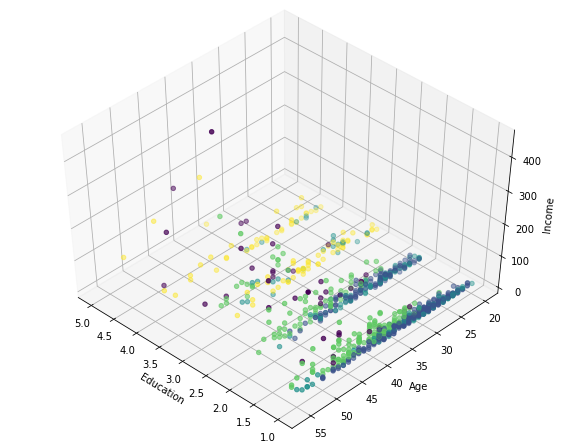

In [85]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(df.iloc[:, 2], df.iloc[:, 1], df.iloc[:, 4], c = labels.astype(np.float))


In [88]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_sample_image

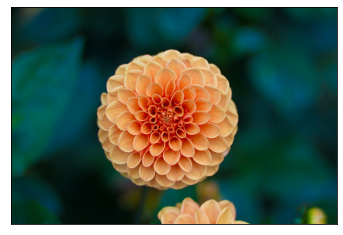

In [94]:
# loading the image
flower = load_sample_image('flower.jpg')
ax = plt.axes(xticks= [], yticks = [])
ax.imshow(flower)

In [95]:
flower.dtype

dtype('uint8')

In [96]:
flower.shape  

(427, 640, 3)

In [97]:
flower

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

One way we can view this set of pixels is as a cloud of points in a three-dimensional color space. We will reshape the data to [n_samples x n_features], and rescale the colors so that they lie between 0 and 1:

In [99]:
fdata = flower / 255.0   # use 0...1 scale
fdata = fdata.reshape(427 * 640, 3)
fdata.shape

(273280, 3)

In [100]:
427 * 640


273280

In [104]:
fdata

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

We can visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency:

In [108]:
def plot_pixels(fdata, title, colors = None, N = 10000):
    if colors is None:
        colors = fdata
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(fdata.shape[0])[:N]
    colors = colors[i]
    R, G, B = fdata[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)

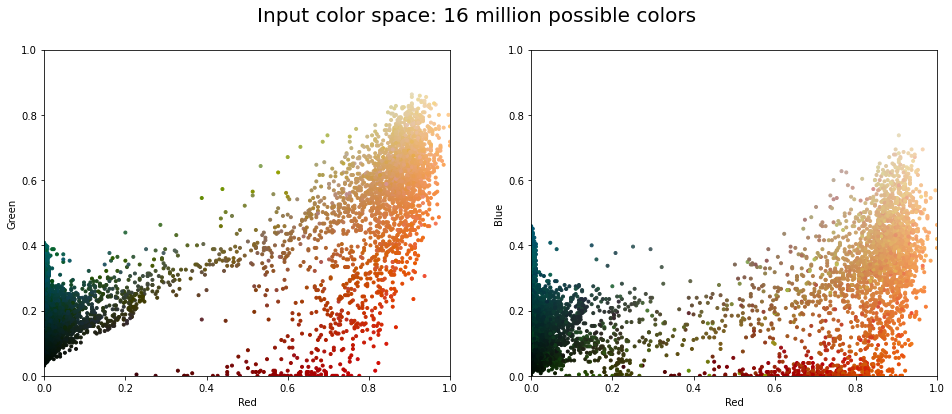

In [109]:
plot_pixels(fdata, title = 'Input color space: 16 million possible colors')

Now let's reduce these 16 million colors to just 16 colors, using a k-means clustering across the pixel space.

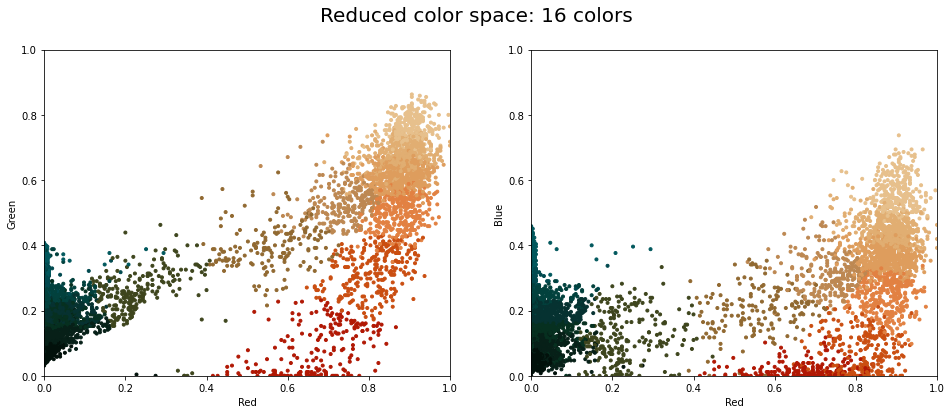

In [110]:
import warnings; warnings.simplefilter('ignore')   # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(fdata)
new_colors = kmeans.cluster_centers_[kmeans.predict(fdata)]

plot_pixels(fdata, colors=new_colors,
            title="Reduced color space: 16 colors")

The result is a re-coloring of the original pixels, where each pixel is assigned the color of its closest cluster center. Plotting these new colors in the image space rather than the pixel space shows us the effect of this:

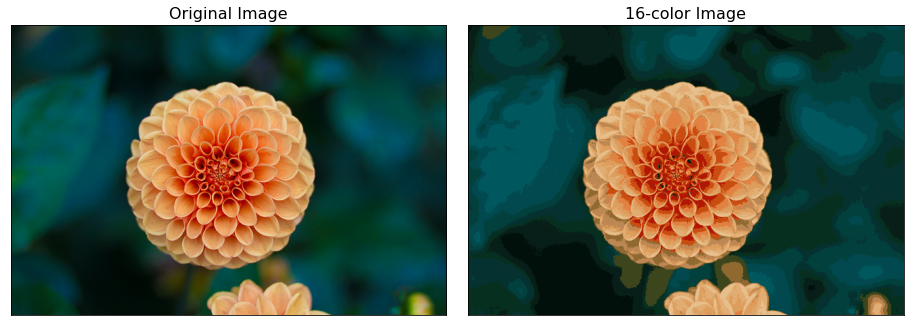

In [111]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);